<a href="https://colab.research.google.com/github/jclauss24/MTLSA_Project/blob/main/DataProcessing/PrelimDataProcessing_Alternate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Data Pre-Processing (Reading Things In, Merging Into One DataFrame)**

Note from Yuca 3/16/2025: the code is currently a bit messy, before we start using the data for our actual ML project training I will definitely go in to streamline this better!

In [ ]:
NASDAQ_tech_index = pd.read_csv("https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/EODHist_20060222-20250315_NDXT.csv")
NASDAQ_tech_index.head()

,Trade Date,Index Value,Net Change,High,Low
0,3/14/25,"9,871.43380056400",330.159478,"9,884.68024363531","9,709.47007758080"
1,3/13/25,"9,541.27432225045",-169.153609,"9,716.73985141897","9,476.85859616226"
2,3/12/25,"9,710.42793165503",126.454775,"9,841.30383374399","9,611.22668003318"
3,3/11/25,"9,583.97315676122",35.421132,"9,740.39948432494","9,449.36740505235"
4,3/10/25,"9,548.55202524772",-495.741338,"9,815.13688029449","9,448.97916658081"


In [ ]:
# prompt: check how many NaN values are in each column individually

print(NASDAQ_tech_index.isna().sum())


Trade Date     1
Index Value    1
Net Change     1
High           1
Low            1
dtype: int64


In [ ]:
# ONLY RUN THIS COLUMN ONCE

NASDAQ_tech_index.columns = ['Date', 'IndexValue_NDXT', 'NetChange_NDXT', 'High_NDXT', 'Low_NDXT']
NASDAQ_tech_index = NASDAQ_tech_index.set_index('Date')
NASDAQ_tech_index.index = pd.to_datetime(NASDAQ_tech_index.index) # datatype that counts nanoseconds, relatively complex datatype in pandas ("one of best to use")

# prompt: remove comma in column "IndexValue_NDXT"
NASDAQ_tech_index["IndexValue_NDXT"] = NASDAQ_tech_index["IndexValue_NDXT"].astype(str).str.replace(",","").astype(float)
NASDAQ_tech_index["High_NDXT"] = NASDAQ_tech_index["High_NDXT"].astype(str).str.replace(",","").astype(float)
NASDAQ_tech_index["Low_NDXT"] = NASDAQ_tech_index["Low_NDXT"].astype(str).str.replace(",","").astype(float)

# turning into float (.astype(float))
NASDAQ_tech_index["NetChange_NDXT"] = NASDAQ_tech_index["NetChange_NDXT"].astype(float)

NASDAQ_tech_index.head()

<ipython-input-37-6b77a74618bd>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NASDAQ_tech_index.index = pd.to_datetime(NASDAQ_tech_index.index) # datatype that counts nanoseconds, relatively complex datatype in pandas ("one of best to use")


,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT
Date,,,,
2025-03-14,9871.433801,330.159478,9884.680244,9709.470078
2025-03-13,9541.274322,-169.153609,9716.739851,9476.858596
2025-03-12,9710.427932,126.454775,9841.303834,9611.226680
2025-03-11,9583.973157,35.421132,9740.399484,9449.367405
2025-03-10,9548.552025,-495.741338,9815.136880,9448.979167


In [ ]:
AAPL_info = pd.read_csv("https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/HistoricalData_AAPL.csv")
AAPL_info.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/14/2025,$213.49,60107580,$211.25,$213.95,$209.58
1,03/13/2025,$209.68,61368330,$215.95,$216.8394,$208.42
2,03/12/2025,$216.98,62547470,$220.14,$221.75,$214.91
3,03/11/2025,$220.84,76137410,$223.805,$225.8399,$217.45
4,03/10/2025,$227.48,72071200,$235.54,$236.16,$224.22


In [ ]:
# prompt: check how many NaN values are in each column individually

print(AAPL_info.isna().sum())


Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [ ]:
GOOGL_info = pd.read_csv("https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/HistoricalData_GOOGL.csv")
GOOGL_info.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/14/2025,$165.49,31995890,$163.27,$166.49,$162.45
1,03/13/2025,$162.76,31756210,$166.035,$166.13,$162.11
2,03/12/2025,$167.11,28372400,$166.58,$167.6399,$163.53
3,03/11/2025,$164.04,39587410,$164.91,$166.75,$161.37
4,03/10/2025,$165.87,43604030,$168.26,$168.46,$163.69


In [ ]:
# prompt: check how many NaN values are in each column individually

print(AAPL_info.isna().sum())


Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [ ]:
# pd.merge?

In [ ]:
merged_ind_stock = pd.merge(GOOGL_info, AAPL_info, on='Date', suffixes=('_GOOGL', '_AAPL'))
merged_ind_stock.head()


,Date,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
0,03/14/2025,$165.49,31995890,$163.27,$166.49,$162.45,$213.49,60107580,$211.25,$213.95,$209.58
1,03/13/2025,$162.76,31756210,$166.035,$166.13,$162.11,$209.68,61368330,$215.95,$216.8394,$208.42
2,03/12/2025,$167.11,28372400,$166.58,$167.6399,$163.53,$216.98,62547470,$220.14,$221.75,$214.91
3,03/11/2025,$164.04,39587410,$164.91,$166.75,$161.37,$220.84,76137410,$223.805,$225.8399,$217.45
4,03/10/2025,$165.87,43604030,$168.26,$168.46,$163.69,$227.48,72071200,$235.54,$236.16,$224.22


In [ ]:
# only run this once from running the code from the top! or else throws an error!
merged_ind_stock = merged_ind_stock.set_index('Date')
merged_ind_stock.head()

,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
Date,,,,,,,,,,
03/14/2025,$165.49,31995890,$163.27,$166.49,$162.45,$213.49,60107580,$211.25,$213.95,$209.58
03/13/2025,$162.76,31756210,$166.035,$166.13,$162.11,$209.68,61368330,$215.95,$216.8394,$208.42
03/12/2025,$167.11,28372400,$166.58,$167.6399,$163.53,$216.98,62547470,$220.14,$221.75,$214.91
03/11/2025,$164.04,39587410,$164.91,$166.75,$161.37,$220.84,76137410,$223.805,$225.8399,$217.45
03/10/2025,$165.87,43604030,$168.26,$168.46,$163.69,$227.48,72071200,$235.54,$236.16,$224.22


In [ ]:
merged_ind_stock.index = pd.to_datetime(merged_ind_stock.index) # datatype that counts nanoseconds, relatively complex datatype in pandas ("one of best to use")

In [ ]:
# Processing GOOGL and APPL dataframes
# ONLY RUN THIS CELL ONCE AS WELL

# remove first character in entry since there is a dollar sign in the front
merged_ind_stock["Close/Last_GOOGL"] = merged_ind_stock["Close/Last_GOOGL"].astype(str).str[1:]
merged_ind_stock["Open_GOOGL"] = merged_ind_stock["Open_AAPL"].astype(str).str[1:]
merged_ind_stock["High_GOOGL"] = merged_ind_stock["High_GOOGL"].astype(str).str[1:]
merged_ind_stock["Low_GOOGL"] = merged_ind_stock["Low_GOOGL"].astype(str).str[1:]

merged_ind_stock["Close/Last_AAPL"] = merged_ind_stock["High_AAPL"].astype(str).str[1:]
merged_ind_stock["Open_AAPL"] = merged_ind_stock["Open_AAPL"].astype(str).str[1:]
merged_ind_stock["High_AAPL"] = merged_ind_stock["High_AAPL"].astype(str).str[1:]
merged_ind_stock["Low_AAPL"] = merged_ind_stock["Low_AAPL"].astype(str).str[1:]

# turning from string into a float (.astype(float))
merged_ind_stock["Close/Last_GOOGL"] = merged_ind_stock["Close/Last_GOOGL"].astype(float)
merged_ind_stock["Open_GOOGL"] = merged_ind_stock["Open_AAPL"].astype(float)
merged_ind_stock["High_GOOGL"] = merged_ind_stock["High_GOOGL"].astype(float)
merged_ind_stock["Low_GOOGL"] = merged_ind_stock["Low_GOOGL"].astype(float)

merged_ind_stock["Close/Last_AAPL"] = merged_ind_stock["High_AAPL"].astype(float)
merged_ind_stock["Open_AAPL"] = merged_ind_stock["Open_AAPL"].astype(float)
merged_ind_stock["High_AAPL"] = merged_ind_stock["High_AAPL"].astype(float)
merged_ind_stock["Low_AAPL"] = merged_ind_stock["Low_AAPL"].astype(float)

In [ ]:
merged_all_stock = pd.merge(NASDAQ_tech_index, merged_ind_stock, on='Date')
merged_all_stock.head()

,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
Date,,,,,,,,,,,,,,
2025-03-14,9871.433801,330.159478,9884.680244,9709.470078,165.49,31995890,211.250,166.4900,162.45,213.9500,60107580,211.250,213.9500,209.58
2025-03-13,9541.274322,-169.153609,9716.739851,9476.858596,162.76,31756210,215.950,166.1300,162.11,216.8394,61368330,215.950,216.8394,208.42
2025-03-12,9710.427932,126.454775,9841.303834,9611.226680,167.11,28372400,220.140,167.6399,163.53,221.7500,62547470,220.140,221.7500,214.91
2025-03-11,9583.973157,35.421132,9740.399484,9449.367405,164.04,39587410,223.805,166.7500,161.37,225.8399,76137410,223.805,225.8399,217.45
2025-03-10,9548.552025,-495.741338,9815.136880,9448.979167,165.87,43604030,235.540,168.4600,163.69,236.1600,72071200,235.540,236.1600,224.22


In [ ]:
inflation_info = pd.read_csv("https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/US_CPI_all_item_city_average%20copy.csv")
inflation_info.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1990,127.4,128.0,128.7,128.9,129.2,129.9,130.4,131.6,132.7,133.5,133.8,133.8,128.7,132.6
1,1991,134.6,134.8,135.0,135.2,135.6,136.0,136.2,136.6,137.2,137.4,137.8,137.9,135.2,137.2
2,1992,138.1,138.6,139.3,139.5,139.7,140.2,140.5,140.9,141.3,141.8,142.0,141.9,139.2,141.4
3,1993,142.6,143.1,143.6,144.0,144.2,144.4,144.4,144.8,145.1,145.7,145.8,145.8,143.7,145.3
4,1994,146.2,146.7,147.2,147.4,147.5,148.0,148.4,149.0,149.4,149.5,149.7,149.7,147.2,149.3


In [ ]:
inflation_info = inflation_info.drop(columns=['HALF1'])
inflation_info = inflation_info.drop(columns=['HALF2'])
inflation_info.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,127.4,128.0,128.7,128.9,129.2,129.9,130.4,131.6,132.7,133.5,133.8,133.8
1,1991,134.6,134.8,135.0,135.2,135.6,136.0,136.2,136.6,137.2,137.4,137.8,137.9
2,1992,138.1,138.6,139.3,139.5,139.7,140.2,140.5,140.9,141.3,141.8,142.0,141.9
3,1993,142.6,143.1,143.6,144.0,144.2,144.4,144.4,144.8,145.1,145.7,145.8,145.8
4,1994,146.2,146.7,147.2,147.4,147.5,148.0,148.4,149.0,149.4,149.5,149.7,149.7


In [ ]:
# prompt: check how many NaN values are in each column individually

print(inflation_info.isna().sum())


Year    0
Jan     0
Feb     0
Mar     1
Apr     1
May     1
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
dtype: int64


In [ ]:
df = pd.DataFrame(inflation_info)

# Melt the DataFrame to reshape it
df_melted = df.melt(id_vars='Year', var_name='month', value_name='value')

# Combine year and month into a datetime column
df_melted['date'] = pd.to_datetime(df_melted['Year'].astype(str) + '-' + df_melted['month'], format='%Y-%b')

print(df_melted)

     Year month    value       date
0    1990   Jan  127.400 1990-01-01
1    1991   Jan  134.600 1991-01-01
2    1992   Jan  138.100 1992-01-01
3    1993   Jan  142.600 1993-01-01
4    1994   Jan  146.200 1994-01-01
..    ...   ...      ...        ...
427  2021   Dec  278.802 2021-12-01
428  2022   Dec  296.797 2022-12-01
429  2023   Dec  306.746 2023-12-01
430  2024   Dec  315.605 2024-12-01
431  2025   Dec      NaN 2025-12-01

[432 rows x 4 columns]


In [ ]:
new_df = df_melted[['date', 'value']].copy()
new_df.columns = ['Date', 'CPI']
new_df = new_df.set_index('Date')
new_df.head()


,CPI
Date,
1990-01-01,127.4
1991-01-01,134.6
1992-01-01,138.1
1993-01-01,142.6
1994-01-01,146.2


In [ ]:
# prompt: reorder Date index to be in calendar order

# Assuming 'merged_all_stock' is your DataFrame with a DatetimeIndex
new_df = new_df.sort_index()
new_df.head()


,CPI
Date,
1990-01-01,127.4
1990-02-01,128.0
1990-03-01,128.7
1990-04-01,128.9
1990-05-01,129.2


In [ ]:
merged_all_info = pd.merge(new_df, merged_all_stock, on='Date')
merged_all_info.head()

,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
Date,,,,,,,,,,,,,,,
2015-04-01,236.599,2342.712311,-9.644089,2349.032568,2325.895386,27.4745,38728640,31.2050,27.9250,27.3015,31.2800,161852560,31.2050,31.2800,30.7750
2015-05-01,237.805,2409.840509,39.624895,2412.313789,2386.591273,27.5580,34615160,31.5250,27.5610,27.1925,32.5325,229396000,31.5250,32.5325,31.3250
2015-06-01,238.638,2460.122159,10.754004,2466.670356,2444.007537,27.4605,33064900,32.8000,27.5285,27.1790,32.8475,128064080,32.8000,32.8475,32.5125
2015-07-01,238.654,2307.602460,8.816711,2324.913174,2300.258724,27.1650,30721360,31.7250,27.2905,26.9880,31.7350,120827560,31.7250,31.7350,31.4975
2015-09-01,237.945,2102.664689,-65.486277,2144.798746,2091.599615,31.4780,51444580,27.5375,32.2220,31.2530,27.9700,306248680,27.5375,27.9700,26.8400


In [ ]:
merged_all_info.describe()

,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,8.000000e+01,80.000000,80.000000,80.000000,80.000000,8.000000e+01,80.000000,80.000000,80.000000
mean,268.039275,5736.497621,9.292133,5790.580089,5675.568981,83.955922,3.695266e+07,97.739190,84.843744,83.043946,98.786505,1.225911e+08,97.739190,98.786505,96.694474
std,26.539729,2638.365152,109.248208,2670.481158,2608.219285,43.824001,1.473377e+07,64.850660,44.352052,43.340103,65.470142,7.056292e+07,64.850660,65.470142,64.104162
min,236.525000,2102.664689,-424.604916,2137.083486,2090.910392,27.165000,1.600613e+07,23.872500,27.290500,26.988000,24.116300,3.528143e+07,23.872500,24.116300,23.832500
25%,245.378000,3536.448809,-27.421121,3537.052936,3513.920414,47.531625,2.698290e+07,38.038125,47.868500,47.447500,38.138125,7.120070e+07,38.038125,38.138125,37.816875
50%,257.277000,5008.726820,10.142135,5066.038761,4969.873610,64.739250,3.302262e+07,66.973750,65.610750,64.234250,69.366250,1.064704e+08,66.973750,69.366250,66.876250
75%,296.284750,8108.494297,50.478459,8150.127249,7988.130917,122.763375,4.089553e+07,155.470000,123.045250,121.803625,156.192500,1.521625e+08,155.470000,156.192500,152.922500
max,315.664000,10832.367099,274.786761,10839.929986,10662.366556,182.990000,1.090090e+08,229.520000,183.880000,181.300000,229.650000,4.473492e+08,229.520000,229.650000,223.740000


**Test Making Plots**

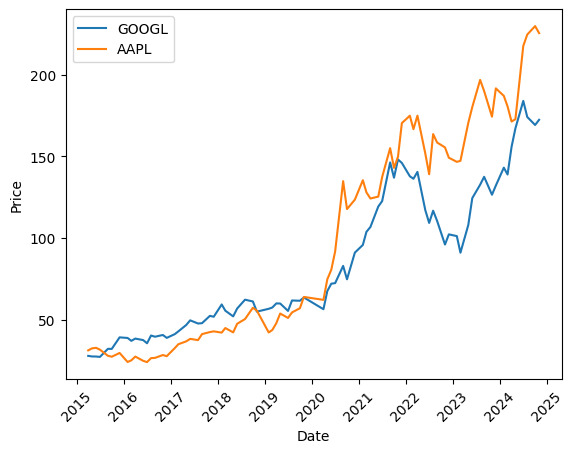

In [ ]:
plt.plot(merged_all_info.index, merged_all_info["High_GOOGL"], linestyle = '-', label="GOOGL")
plt.plot(merged_all_info.index, merged_all_info["High_AAPL"],linestyle = '-', label="AAPL")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45) # slightly tilts the dates so it's easier to read
plt.legend()
plt.show()


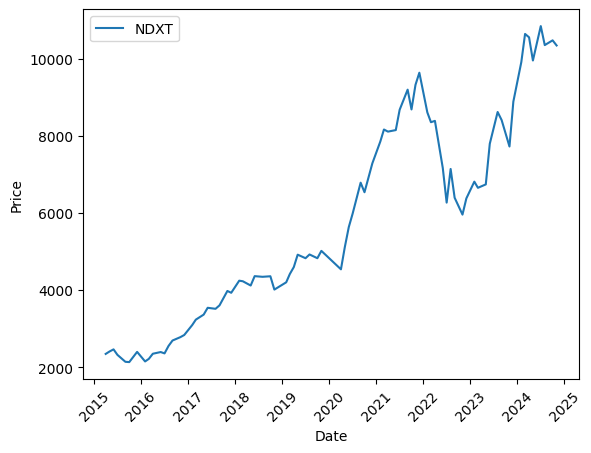

In [ ]:
# plt.plot(merged_all_stock.index, merged_all_stock["High_GOOGL"], linestyle = '-', label="GOOGL")
# plt.plot(merged_all_stock.index, merged_all_stock["High_AAPL"],linestyle = '-', label="AAPL")

plt.plot(merged_all_info.index, merged_all_info["High_NDXT"],linestyle = '-', label="NDXT")

# plt.xlim(16900,17000)
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45) # slightly tilts the dates so it's easier to read
plt.legend()
plt.show()


(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

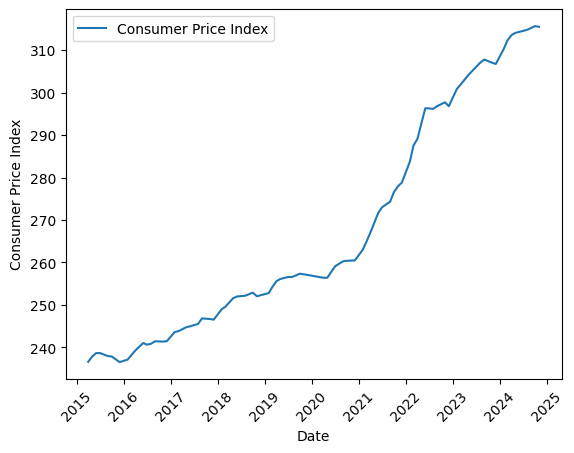

In [ ]:
plt.plot(merged_all_info.index, merged_all_info["CPI"], linestyle = '-', label="Consumer Price Index")
plt.xlabel("Date")
plt.ylabel("Consumer Price Index")
plt.legend()
plt.xticks(rotation=45) # slightly tilts the dates so it's easier to read